In [63]:
from __future__ import division
import seaborn as sns

##  Linear Regression:  $Y_{i} = \alpha + \beta * X_{i} + \epsilon_{i}$

In [ ]:
# http://csrgxtu.github.io/2015/03/20/Writing-Mathematic-Fomulars-in-Markdown/
# Markdown math

In [3]:
# helper funcs for calculation
def mean(x):
    return sum(x) / len(x)

def de_mean(x):
    """translate x by subtracting its mean, so that result has 0 mean
    """
    return [x_i - mean(x) for x_i in x]

def covariance(x, y):
    return dot(de_mean(x), de_mean(y)) / (len(x)-1)

def correlation(x, y):
    std_x, std_y = standard_deviation(x), standard_deviation(y)
    
    if std_x > 0 and std_y > 0:
        return covariance(x, y) / std_x / std_y

In [438]:
# for example Yi: minutes that user i spent on the site daily,
#             Xi: number of friends user i has

# with determined alpha and beta
def predict(alpha, beta, x_i):
    return beta * x_i + alpha

# evaluate by error
# problem: aggregated errors may cancel out neg & pos errors
def error(alpha, beta, x_i, y_i):
    return y_i - predict(alpha, beta, x_i)

# evaluate by Sum of Squared Errors:
def sum_of_squared_errors(alpha, beta, x, y):
    return sum( error(alpha, beta, x_i, y_i)**2
        for y_i, x_i in zip(y, x))

# OLS the least square solution is to choose
# alpha and beta that minimizes the errors
def least_squares_fit(x, y):
    """giving training values for x and y, find the best alpha and beta
    """
    beta = correlation(x, y) * standard_deviation(y) / standard_deviation(x)
    
    # alpha 
    alpha = mean(y) - beta * mean(x)
    
    return alpha, beta

In [ ]:
# test


outlier = num_friends.index(100)

num_friends_good = [x for i,x in enumerate(num_friends) if num i != outlier ]

daily_minutes_good = [x for i,x in enumerate(daily_minutes) if ]

In [12]:
users = [
    {"id":0, "name":"Hero"},
    {"id":1, "name":"Dunn"},
    {"id":2, "name":"Sue"},
    {"id":3, "name":"Chi"},
    {"id":4, "name":"Thor"},
    {"id":5, "name":"Clive"},
    {"id":6, "name":"Hicks"},
    {"id":7, "name":"Devin"},
    {"id":8, "name":"Kate"},
    {"id":9, "name":"kline"},
]

friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
(4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]


for user in users:
    user['friends'] = []
    
for i, j in friendships:
    # index by sequence, which is same as id
    # users[i]['friends'] is a list, has func append()
    users[i]['friends'].append(users[j]['id']) 
    users[j]['friends'].append(users[i]['id'])


In [21]:
# Some statistics

# average num of connections
total_connections = sum(len(user['friends']) for user in users)
avg_connections = total_connections / len(users)
print(avg_connections)

# most connected people
user_friend_count_pair = [(user['id'], len(user['friends'])) for user in users]
user_friend_count_pair = sorted(user_friend_count_pair, 
                                key=lambda x:x[1] , 
                                reverse=True)
print(user_friend_count_pair)

2.4
[(1, 3), (2, 3), (3, 3), (5, 3), (8, 3), (0, 2), (4, 2), (6, 2), (7, 2), (9, 1)]


In [57]:
# friends recommendation: friends' friends
# TODO: count of mutual friends, exclude ppl already known to the user
from collections import Counter, defaultdict

def friends_of_friends_of(user):
    return Counter(fof_id
            for friend in user['friends']
            for fof_id in users[friend]['friends']
            if user['id'] != fof_id # not user himself
            and fof_id not in user['friends']) # not user's direct friends
            
friends_of_friends_of(users[3])

Counter({0: 2, 5: 1})

In [61]:
interests = [
    (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
    (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
    (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
    (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
    (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
    (3, "statistics"), (3, "regression"), (3, "probability"),
    (4, "machine learning"), (4, "regression"), (4, "decision trees"),
    (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
    (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
    (6, "probability"), (6, "mathematics"), (6, "theory"),
    (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
    (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
    (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
    (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]
# Thor (4th) and Devin (7th) have no friends in common but share interest in Machine Learning

# search data scientists who have common interest in an item
def data_scientists_with_interest_with(target_interest):
    return [ds_id
            for ds_id, interest in interests
            if interest == target_interest
           ]
data_scientists_with_interest_with("Big Data")

# build an index from interests to users
# keys are interests, values are lists of users who have that interest
def get_interest_user_index():
    res = defaultdict(list)
    for user, interest in interests:
        res[interest].append(user)
    return res
user_ids_by_interest =  get_interest_user_index()

# from users to interests, users as index
interests_by_user_id = defaultdict(list)
for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)

# find out who has the most interests in common with the given user

def most_common_interests_with(user_id):
    return Counter(interested_user_id
                  for interest in interests_by_user_id[user_id]
                  for interested_user_id in user_ids_by_interest[interest]
                  if interested_user_id != user_id
                  )
most_common_interests_with(0)

Counter({9: 3, 8: 1, 1: 2, 5: 1})

In [70]:
import matplotlib.pyplot as plt
salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
                        (48000, 0.7), (76000, 6),
                        (69000, 6.5), (76000, 7.5),
                        (60000, 2.5), (83000, 10),
                        (48000, 1.9), (63000, 4.2)]
reverse_salaries_and_tenures = [(item[1],item[0]) for item in salaries_and_tenures]

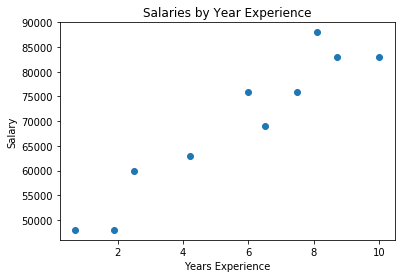

In [72]:
plt.scatter(*zip(*reverse_salaries_and_tenures))
plt.title('Salaries by Year Experience')
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.show();

In [76]:
# compute average salary for each tenure
salary_by_tenure = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    salary_by_tenure[tenure].append(salary)

average_salary_by_tenure = {
    tenure : sum(salaries) / len(salaries)
    for tenure, salaries in salary_by_tenure.items()
 }

# bucket the tenures 
# into three groups
def tenure_bucket(tenure):
    if tenure < 2:
        return 'less than two'
    elif tenure < 5:
        return 'btw two and five'
    else:
        return 'more than more'


# compute salary by tenure bucket
salary_by_bucket = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    bucket = tenure_bucket(tenure)
    salary_by_bucket[bucket].append(salary)

average_salary_by_bucket =  {
    bucket : sum(salaries) / len(salaries)
    for bucket, salaries in salary_by_bucket.items()
}

average_salary_by_bucket

{'more than more': 79166.66666666667,
 'less than two': 48000.0,
 'btw two and five': 61500.0}

In [77]:
def predict_paid_unpaid(years_exxperience):
    if years_exxperience < 3.0:
        return 'paid'
    elif years_exxperience < 8.5:
        return 'unpaid'
    else:
        return 'paid'

In [84]:
# popular interests
top_popular = Counter(
    interest
    for user_id, interest in interests
).most_common(5)
top_popular

[('Big Data', 3), ('Java', 3), ('Python', 3), ('Hadoop', 2), ('HBase', 2)]

In [88]:
# Chapter 2 Python Crash Course
for i in [1,2,3,4,5]:
    print('i:',i)
    for j in [1,2,3,4,5]:
        print('j:',j)
        print('i+j:',i+j,'\n')

i: 1
j: 1
i+j: 2 

j: 2
i+j: 3 

j: 3
i+j: 4 

j: 4
i+j: 5 

j: 5
i+j: 6 

i: 2
j: 1
i+j: 3 

j: 2
i+j: 4 

j: 3
i+j: 5 

j: 4
i+j: 6 

j: 5
i+j: 7 

i: 3
j: 1
i+j: 4 

j: 2
i+j: 5 

j: 3
i+j: 6 

j: 4
i+j: 7 

j: 5
i+j: 8 

i: 4
j: 1
i+j: 5 

j: 2
i+j: 6 

j: 3
i+j: 7 

j: 4
i+j: 8 

j: 5
i+j: 9 

i: 5
j: 1
i+j: 6 

j: 2
i+j: 7 

j: 3
i+j: 8 

j: 4
i+j: 9 

j: 5
i+j: 10 



In [89]:
list_of_lists = [[1,2,3],
                 [4,5,6],
                 [7,8,9]]

In [91]:
from collections import operators

ImportError: cannot import name 'operators'

In [93]:
words = ['Apple', 'Like', 'Like', 'Huawei', 'Huawei']

words_count = Counter(words)

sorted_words_count = sorted(words_count.items(), key=lambda x:x[1], reverse=True) 
sorted_words_count

[('Like', 2), ('Huawei', 2), ('Apple', 1)]

In [99]:
# List Comprehension
# transform a list into another list
even_num = [x for x in range(10) if x % 2 == 0]
squares = [x*x for x in range(5)]
even_num_squares = [x*x for x in even_num]

# init a set or dict by {}, the difference is :
square_dict = {x : x*x for x in even_num}
square_set = {x*x for x in [-1,1]}
square_set

{1}

In [101]:
# use underscore to skip unwannted values
zeros = [0 for _ in even_num]
# list comprehension with multiple fors
# later for could use earlier for
pair = [(x,y)
        for x in range(10)
        for y in range(x+1,10)]
pair

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (6, 7),
 (6, 8),
 (6, 9),
 (7, 8),
 (7, 9),
 (8, 9)]

In [102]:
# randomness
import random

In [105]:
four_uniform_random = [random.random() for _ in range(4)]
four_uniform_random

[0.6330350776658092,
 0.695738431324463,
 0.19843720250639052,
 0.5004887731540931]

In [124]:
# shuffle
up_to_10 = list(range(10))
random.shuffle(up_to_10)

# pick - randomly choose with duplicates (replacement)

print([random.choice(range(10)) for _ in range(5)])

# sample - randomly choose without duplicates (no replacement)
print([random.sample(range(10), 2) for _ in range(5)])

[5, 2, 6, 9, 1]
[[4, 3], [7, 4], [2, 4], [6, 2], [5, 0]]


In [125]:
# Regular Expression
# regular expression provides a way of searching text
import re

In [138]:
# OOP
# rebuild class set
class Set:
    def __init__(self,values=None):
        """constructor, it gets called when u created a new set
        """
        self.dict = {}
        
        if values is not None:
            for value in values:
                self.add(value)
    
    def add(self, value):
        self.dict[value] = True
    
    def contains(self, value):
        return value in self.dict
    
    def remove(self, value):
        del self.dict[value]

In [141]:
my_set = Set([3,4,5])
my_set.add(6)
my_set.contains(6)
my_set.remove(6)
my_set.contains(6)

False

In [143]:
# enumerate - use both value and index
# Pythonic way: enumerate
documents = []
for i, doc in enumerate(documents):
    print(i, doc)

In [148]:
# zip - zip transforms several lists into a single list with tuple of corresponding items
list1 = ['a', 'b', 'c']
list2 = [1,2,3]
x = list(zip(list1,list2))
x_store = x[:]
print(x_store)

[('a', 1), ('b', 2), ('c', 3)]


In [150]:
letters, nums = zip(*x_store) # asterisk performs argument unpacking
print(nums)

# use argument unpacking with any func: my_set.add(*[1,2])

(1, 2, 3)


In [151]:
import matplotlib.pyplot as plt

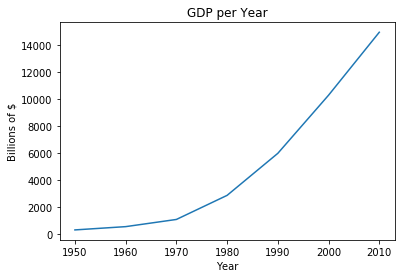

In [156]:
# Line Chart
# data
years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

# create a line chart
plt.plot(years, gdp, linestyle='solid')
plt.title('GDP per Year')
plt.xlabel('Year')
plt.ylabel('Billions of $')
plt.show;

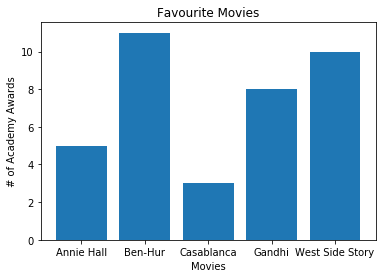

In [161]:
# Bar Chart
# show how some quantity varies among some DISCRETE set of items
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_of_oscar = [5, 11, 3, 8, 10]

plt.bar(movies, num_of_oscar)
plt.title('Favourite Movies')
plt.xlabel('Movies')
plt.ylabel('# of Academy Awards')
#plt.tight_layout()
plt.show();

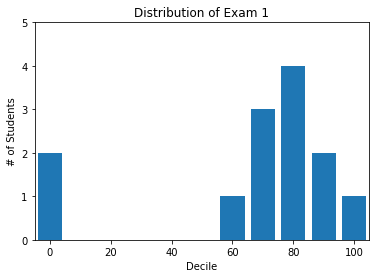

In [171]:
# Bar chart for plotting histograms of bucketed numeric values
# in order to explore how the values are distributed

grades = [83,95,91,87,70,0,85,82,100,67,73,77,0]
decile = lambda grade : grade // 10 * 10
histogram = Counter(decile(grade) for grade in grades)
plt.bar(histogram.keys(), histogram.values(), 8) # width = 8
plt.title('Distribution of Exam 1')
plt.xlabel('Decile')
plt.ylabel('# of Students')
plt.axis([-5,105, 0, 5])
plt.show()

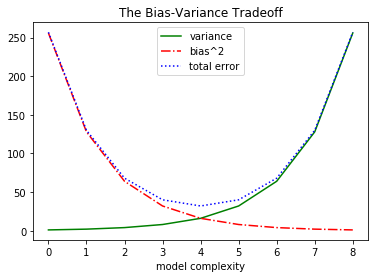

In [178]:
# Line Chart
# good for showing trends

# data
variance = [1, 2, 4, 8, 16, 32, 64, 128, 256]
bias_squared = [256, 128, 64, 32, 16, 8, 4, 2, 1]
total_error = [x+y for x, y in zip(variance, bias_squared)]
xs = [i for i, _ in enumerate(variance)]

# plot
plt.plot(xs, variance, 'g-', label='variance')
plt.plot(xs, bias_squared, 'r-.', label='bias^2')
plt.plot(xs, total_error, 'b:', label='total error')
plt.legend(loc=9)
plt.xlabel('model complexity')
plt.title('The Bias-Variance Tradeoff')
plt.show();

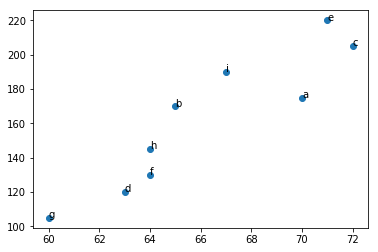

In [183]:
# Scatter Plot
# for visualizing the relationship of two paired sets of data
friends = [ 70, 65, 72, 63, 71, 64, 60, 64, 67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

fig, ax = plt.subplots()
ax.scatter(friends, minutes)

# label the points
for i, label in enumerate(labels):
    ax.annotate(label, (friends[i], minutes[i]))
plt.show()



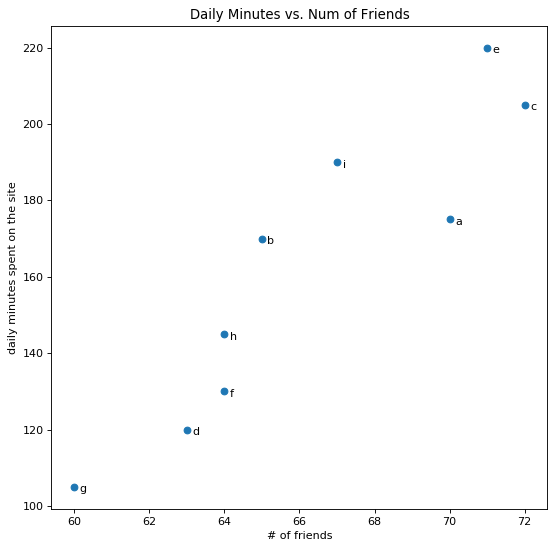

In [190]:
# another way to do scatter plot
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(friends, minutes)
# annotate
for i, label in enumerate(labels):
    plt.annotate(label, (friends[i], minutes[i]), xytext=(5,-5), textcoords='offset points')

plt.xlabel('# of friends')
plt.ylabel('daily minutes spent on the site')
plt.title('Daily Minutes vs. Num of Friends')
plt.show()

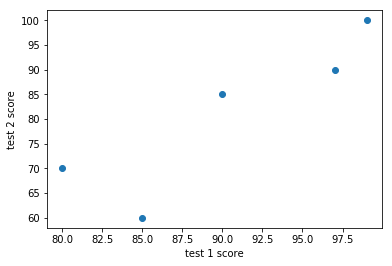

In [193]:
# misleading one
test_1 = [ 99, 90, 85, 97, 80]
test_2 = [100, 85, 60, 90, 70]
plt.scatter(test_1, test_2)
plt.xlabel('test 1 score')
plt.ylabel('test 2 score')
plt.show();

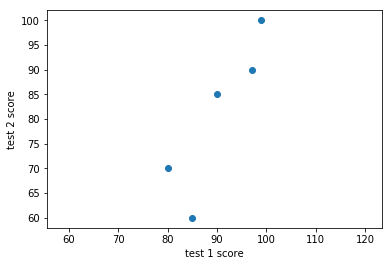

In [194]:
plt.scatter(test_1, test_2)
plt.axis('equal')
plt.xlabel('test 1 score')
plt.ylabel('test 2 score')
plt.show();
# findings: most of the variations come from test 2

In [209]:
# Linear Algebra

from functools import partial, reduce
import math

def vector_add(v,w):
    """add corresponding elements
    """
    return [v_i+w_i
            for v_i, w_i in zip(v,w)]

# subtract two vectors
def vector_subtract(v,w):
    return [v_i - w_i
            for v_i, w_i in zip(v,w)]

def vector_sum(vectors):
    """sum all corresponing elements
    """
    res = vectors[0]
    for vector in vectors[1:]:
        res = vector_add(res, vector)
    return res

# reduce
# use vector_add to reduce vectors
def vector_sum(vectors):
    return reduce(vector_add, vectors)

vector_sum = partial(reduce, vector_add)

def scalar_mutiply(s, vector):
    return [s*v_i 
            for v_i in vector ]

# compute the componentwise mean of a list of same-sized vectors
def vector_mean(vectors):
    n = len(vectors)
    return scalar_mutiply(1/n, vector_sum(vectors))

# dot product of two vectors
# sum of the their componentwise products
# this is the length of the vector you get if you project v on w
def dot(v,w):
    return sum(v_i*w_i
               for v_i, w_i in zip(v,w))

# compute a vector's sum of squares
# v_1*v_1 + v_2*v_2 + ... + v_n*v_n
def sum_of_squares(v):
    return dot(v, v)

def squared_distance(v,w):
    """(v_1-w_1)^2 + ... + (v_n-w_n)^2
    """
    return sum_of_squares(vector_subtract(v,w))

def distance(v,w):
    math.sqrt(squared_distance(v,w))

In [218]:
# Matrices
# a matrix is a 2-d collection of numbers
# present matrix as list of lists
# A[i][j]: element in the ith row and jth col

# A has len(A) rows and len(A[0]) columns
A = [[1,2,3],
     [4,5,6],
     [7,8,9]]

B = [[1,2],
     [4,5],
     [7,8]]

def shape(A):
    num_rows = len(A)
    num_cols = len(A[0])
    return num_rows,num_cols

# get row by index df.iloc[]
def get_row(A, i):
    return A[i]

def get_col(A, j):
    return [A_i[j]
            for A_i in A]

def make_matrix(num_rows, num_cols, entry_func):
    return [[entry_func(i, j)
            for j in range(num_cols)]
            for i in range(num_rows)]

def sum_up(i,j):
    return i+j

def is_digonal(i, j):
    return 1 if i ==j else 0
    
print(make_matrix(3,3,is_digonal))



[[1, 0, 0], [0, 1, 0], [0, 0, 1]]


In [228]:
# Chapter 5 Statistics
# Describing a single set of data
from random import choices
num_friends = choices(range(100), k=50)

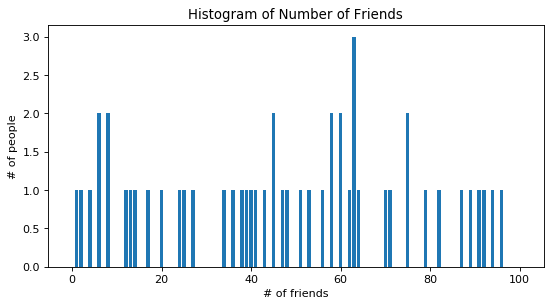

In [232]:
friends_count = Counter(num_friends)
xs = range(101)
ys = [friends_count[x] for x in xs]
plt.figure(figsize=(8, 4), dpi=80)
plt.bar(xs, ys)
plt.title('Histogram of Number of Friends')
plt.xlabel('# of friends')
plt.ylabel('# of people')
plt.show();

In [245]:
from scipy import stats
from statistics import median

In [237]:
stats.describe(num_friends)

DescribeResult(nobs=50, minmax=(1, 96), mean=47.1, variance=781.6836734693876, skewness=-0.025385578622842297, kurtosis=-1.045087566006525)

In [239]:
# central tendency
def mean(x):
    return sum(x) / len(x)
mean(num_friends)

47.1

In [252]:
def median_list(x):
    x_len = len(x)
    x_sorted = sorted(x)
    idx_middle = x_len// 2
    
    # if odd
    if x_len % 2 != 0:
        return x_sorted[idx_middle]
    # if even
    else:
        return (x_sorted[idx_middle] + x_sorted[idx_middle-1]) / 2

In [246]:
median(num_friends)

47.5

In [253]:
median_list(num_friends)

47.5

In [262]:
def quantile(v, p):
    """return the pth pencentile value of list
    """
    if p < 0 or p >= 1:
        print('invalid p, p has range(0,1)')
        return
    idx = int(p*len(v))
    return sorted(v)[idx]

In [263]:
quantile(num_friends, 0)

1

In [ ]:
def mode(v):
    """find the most frequent items in the list, return a list for mutiple values
    """
    

In [276]:
counts = Counter(num_friends)
max_count = max(counts.values())
res = [x 
       for x, count in counts.items()
       if count == max_count]
res

[63]

In [277]:
counts

Counter({43: 1,
         58: 2,
         25: 1,
         89: 1,
         45: 2,
         56: 1,
         82: 1,
         40: 1,
         38: 1,
         2: 1,
         51: 1,
         96: 1,
         63: 3,
         34: 1,
         79: 1,
         91: 1,
         75: 2,
         48: 1,
         47: 1,
         60: 2,
         6: 2,
         92: 1,
         13: 1,
         4: 1,
         39: 1,
         62: 1,
         71: 1,
         53: 1,
         1: 1,
         24: 1,
         20: 1,
         94: 1,
         8: 2,
         27: 1,
         87: 1,
         64: 1,
         17: 1,
         14: 1,
         41: 1,
         12: 1,
         70: 1,
         36: 1})

In [278]:
# Dispersion
def data_range(v):
    return max(v) - min(v)

In [279]:
data_range(num_friends)

95

In [286]:
def de_mean(v):
    v_mean = mean(v)
    return [v_i - v_mean for v_i in v]

def variance(v):
    deviations = de_mean(v)
    return sum_of_squares(deviations) / (len(v))

def standard_deviation(v):
    return math.sqrt(variance(v))

In [287]:
standard_deviation(num_friends)

27.67760827817317

In [288]:
import numpy as np
var = np.std(num_friends)
var

27.677608278173167

In [291]:
num_friends.append(500)

In [292]:
standard_deviation(num_friends)

91.22678638017695

In [302]:
num_friends = num_friends[:-1]

In [306]:
# Correlation
def covariance(x,y):
    return dot(de_mean(x), de_mean(y)) / len(x)

In [297]:
daily_minutes = choices(range(1,200), k=50)
daily_minutes

[118,
 157,
 96,
 166,
 161,
 17,
 47,
 63,
 21,
 195,
 8,
 65,
 95,
 191,
 185,
 36,
 9,
 104,
 165,
 142,
 8,
 135,
 67,
 120,
 28,
 62,
 102,
 177,
 165,
 167,
 15,
 45,
 55,
 190,
 178,
 194,
 3,
 139,
 43,
 50,
 147,
 69,
 196,
 171,
 126,
 81,
 35,
 99,
 13,
 102]

In [307]:
covariance(daily_minutes, num_friends)

-100.48600000000005

In [304]:
np.cov(daily_minutes, num_friends)

array([[4005.72285714, -102.53673469],
       [-102.53673469,  781.68367347]])

In [ ]:
# correlation
# correlation is unitless, always lay between [-1,1]
def correlation(v,w):
    std_v = standard_deviation(v)
    std_w = standard_deviation(w)
    if std_v > 0 and std_w > 0:
        return covariance(v,w) / std_v / std_w
    return 0

In [309]:
np.corrcoef(daily_minutes, num_friends)

array([[ 1.        , -0.05794601],
       [-0.05794601,  1.        ]])

In [310]:
from scipy.stats.stats import pearsonr
pearsonr(daily_minutes, num_friends)

(-0.05794600682287938, 0.6893680614995765)

In [311]:
correlation(daily_minutes, num_friends)

-0.05794600682287938

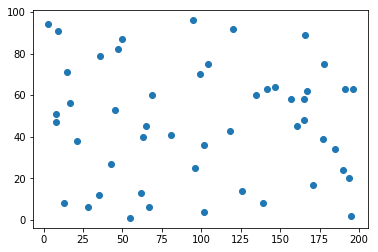

In [312]:
plt.scatter(daily_minutes, num_friends)
plt.show();

In [313]:
max(num_friends)

96

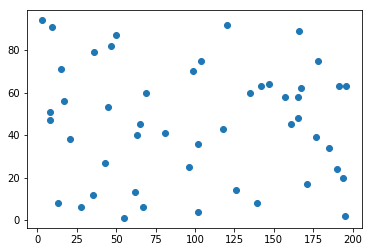

In [317]:
# scatter plot except for outlier
outlier = num_friends.index(96)

num_friends_clean = [friend
                     for i, friend in enumerate(num_friends)
                     if i != outlier]

daily_minutes_clean = [minute
                       for i, minute in enumerate(daily_minutes)
                       if i != outlier]

plt.scatter(daily_minutes_clean, num_friends_clean)
plt.show();

In [ ]:
# Chapter 6. Probability
# probability - a way of qiantifying uncertainty associated with events choosen
# from a some universe of events
# P(E) - probability of event E


# Dependence - Independence
# Dependence - E and F are dependent if knowing sth about wether E happens givens us
# info about if F happens, otherwise they are independent
# Independent: P(E,F) = P(E)*P(F)


# Conditional Probability
# independent: P(E,F) = P(E)*P(F)
# conditional on F: P(E|F) = P(E,F) / P(F) when the P of F is not 0

# if E and F are not independent:
# P(E,F) = P(E|F) * P(F)
# P(E|F) = P(E) if E and F are independent

# Question: what is the P of 'both children are girls'(B) conditional on 'the 1st is girl'(G)?
# P(B|G) = P(B,G) / P(G) = P(B) / P(G) = (1/4 )/ (1/2) = 1/2
# event B&G P(B,G) = P(B) since P(B) necessarily means P(G) 

# Q: 'both children are girls'(B) conditional on 'at least one child is girl'(L)
# P(B|L) = P(B,L) / P(L) = P(B) / P(L) = (1/4) / (3/4) = 1/3


# Bayes's Theorem
# a way of reversing conditional probability
# P(E|F) = P(E,F) / P(F) = P(F|E)*P(E)/P(F)
# P(F) = P(F,E) + P(F,not E)
# p(E|F) = P(F|E)*P(E) / [P(F|E)*P(E) + P(F|not E)*P(not E)]

# Random Variables
# a radnom variable is a variable whose values have an associated probability distribution
# exaple: coin:50%, random.choice(range(10)):10%

In [ ]:
# Chapter 19. Clustering

In [364]:
class KMeans:
    """performs k-means clustering"""
    
    def __init__(self, k):
        self.k = k # number of clusters
        self.means = None # means of clusters
        
    def classify(self, input):
        """return the index of the cluster closest to the input"""
        return min(range(self.k),
                key=lambda i: squared_distance(input, self.means[i]))
    
    def train(self, inputs):
        # choose k random points as the initial means
        self.means = random.sample(inputs, self.k)
        assignments = None
        
        while True:
            # Find new assignments
            new_assignments = list(map(self.classify, inputs))
            
            # If no assignments have changed, we're done.
            if assignments == new_assignments:
                return
            
            # Otherwise keep the new assignments,
            assignments = new_assignments
            
            # And compute new means based on the new assignments
            for i in range(self.k):
                # find all the points assigned to cluster i
                i_points = [p for p, a in zip(inputs, assignments) if a == i]
                # make sure i_points is not empty so don't divide by 0
                if i_points:
                    self.means[i] = vector_mean(i_points)

In [365]:
# Example Meetups

inputs = [[-14,-5],[13,13],[20,23],[-19,-11],[-9,-16],[21,27],[-49,15],[26,13],[-46,5],[-34,-1],[11,15],[-49,0],[-22,-16],[19,28],[-12,-8],[-13,-19],[-41,8],[-11,-6],[-25,-9],[-18,-3]]
random.seed(0)
cluster = KMeans(3)
cluster.train(inputs)
print(cluster.means)

[[-25.857142857142854, -4.714285714285714], [20.0, 26.0], [16.666666666666664, 13.666666666666666]]


In [366]:
input_x = [x[0] for x in inputs]
input_y = [x[1] for x in inputs]

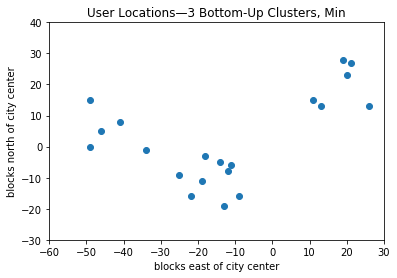

In [367]:
plt.scatter(input_x, input_y)
plt.title("User Locations—3 Bottom-Up Clusters, Min")
plt.xlabel("blocks east of city center")
plt.ylabel("blocks north of city center")
plt.axis([-60,30, -30, 40])
plt.show()

In [ ]:
for i, cluster, marker, color in zip([1, 2, 3],
three_clusters,
['D','o','*'],
['r','g','b']):
xs, ys = zip(*cluster) # magic unzipping trick
plt.scatter(xs, ys, color=color, marker=marker)
# put a number at the mean of the cluster
x, y = vector_mean(cluster)
plt.plot(x, y, marker='$' + str(i) + '$', color='black')
plt.title("User Locations—3 Bottom-Up Clusters, Min")
plt.xlabel("blocks east of city center")
plt.ylabel("blocks north of city center")
plt.show()

In [382]:
# calculate every input's distance to its predicted cluster mean (middle point)
def squared_clustering_errors(inputs, k):
    cluster = KMeans(k)
    cluster.train(inputs)
    means = cluster.means
    assignments = map(cluster.classify, inputs)
    
    return sum([squared_distance(input, means[cluster]) 
                for input, cluster in zip(inputs, assignments)])


In [388]:
def plot_squared_clustering_errors(inputs):
    ks = range(1,len(inputs)+1)
    errors = [squared_clustering_errors(inputs,k) for k in ks]
    
    plt.plot(ks, errors)
    plt.xticks(ks)
    plt.xlabel('k')
    plt.ylabel('total_squared_error')
    plt.title('Total Error vs. # of K')
    plt.show()

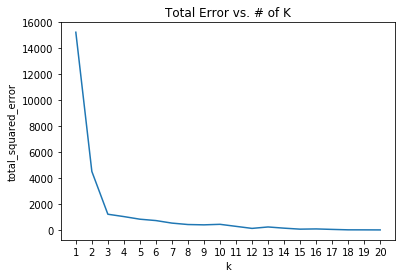

In [389]:
plot_squared_clustering_errors(inputs)

In [401]:
# Example Clustering Colors
path = r"/Users/pliu/Downloads/o.jpg"
import matplotlib.image as mpimg
img = mpimg.imread(path)
type(img) # a list of lists of lists
# img[i][j] is the pixel at row i and col j
# and each pixel is actually a list of [red, green, blue] (num btw 0 and 1) indicating colors

numpy.ndarray

In [402]:
top_row = img[0]
top_row_pixel = top_row[0]
red, green, blue = top_row_pixel
red, green, blue 

(13, 10, 17)

In [403]:
pixels = [pixel
          for row in img
          for pixel in row]

cluster = KMeans(5)
cluster.train(pixels)

/miniconda3/envs/ml36/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in ubyte_scalars
  from ipykernel import kernelapp as app
/miniconda3/envs/ml36/lib/python3.6/site-packages/ipykernel_launcher.py:46: RuntimeWarning: overflow encountered in ubyte_scalars
/miniconda3/envs/ml36/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in ubyte_scalars
  # Remove the CWD from sys.path while we load stuff.


KeyboardInterrupt: 

In [395]:
def recolor(pixel):
    cluster_res = cluster.classify(pixel)
    return cluster.means[cluster_res]

In [ ]:
# new_img is composed by original pixel's recolored pixel (cluster mean)
new_img = [[recolor(pixel) for pixel in row]
           for row in img]

In [ ]:
# show img
plt.imshow(new_img)
plt.axis('off')
plt.show()

In [ ]:
plt.imshow(img)
plt.axis('off')
plt.show();

In [ ]:
# Bottom - up Hierarchical Clustering 

In [445]:
# Chap.14 Simple Linear Regression

# predict
def predict(alpha, beta, x_i):
    return beta * x_i + alpha

# measure performance - error
def error(x_i, y_i, alpha, beta):
    return y_i - predict(alpha, beta, x_i)


def sum_of_squared_error(alpha, beta, x, y):
    return sum(error(x_i, y_i, alpha, beta)**2
        for x_i, y_i in zip(x,y))

def least_square_fit(x,y):
    """given training data x and y
       find alpha and beta that minimize sum of squared error
    """
    beta = correlation(x,y) * standard_deviation(y) / standard_deviation(x)
    alpha = mean(y) - beta * mean(x)
    return alpha, beta



In [425]:
num_friends_good = [49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
daily_minutes_good = [68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

In [419]:
alpha, beta = least_square_fit(num_friends_good, daily_minutes_good)
# a user has no friend would still spend averagely 23 minutes daily
# an increase in # of friends would increase daily active mins by 0.9

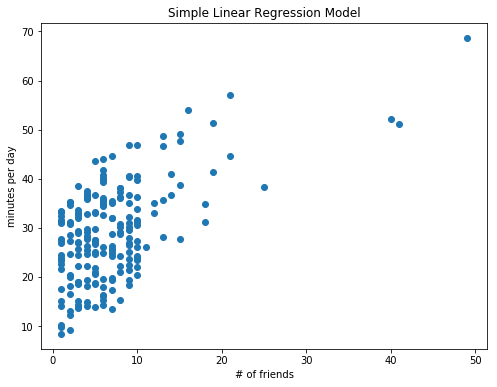

In [417]:
plt.figure(figsize=(8,6))
plt.scatter(num_friends_good, daily_minutes_good)
plt.xlabel('# of friends')
plt.ylabel('minutes per day')
plt.title('Simple Linear Regression Model')
plt.show();

In [446]:
# evaluate the fitting - coefficient of determination (R^2)
# measures the total variation in the dependent var is captured by the independent var

def total_sum_of_squares(y):
    return sum(v**2 for v in de_mean(y))

def r_squared(alpha, beta, x, y):
    y_variance = total_sum_of_squares(y)
    y_captured = sum_of_squared_error(alpha, beta, x, y)
    
    return 1- y_captured / y_variance

In [447]:
r_squared(alpha, beta, num_friends_good, daily_minutes_good)
# benchmark R^2 in range(0,1), the closer to 1 the better

0.3291078377836305

In [451]:
# Using Gradient Descent
def squared_error(x_i, y_i, theta):
    alpha, beta = theta
    return error(x_i, y_i, alpha, beta)**2

def squared_error_gradient(x_i, y_i, theta):
    alpha, beta = theta
    res = [-2 * error(x_i, y_i, alpha, beta), # derivative of alpha
           -2 * error(x_i, y_i, alpha, beta) * x_i] # detivative of beta

In [458]:
def scalar_multiply(c, v):
    return [c * v_i for v_i in v]

In [456]:
def in_random_order(data):
    """generator that returns the elements of data in random order"""
    indexes = [i for i, _ in enumerate(data)]  # create a list of indexes
    random.shuffle(indexes)                    # shuffle them
    for i in indexes:                          # return the data in that order
        yield data[i]

In [454]:
def minimize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=0.01):

    data = list(zip(x, y))
    theta = theta_0                             # initial guess
    alpha = alpha_0                             # initial step size
    min_theta, min_value = None, float("inf")   # the minimum so far
    iterations_with_no_improvement = 0

    # if we ever go 100 iterations with no improvement, stop
    while iterations_with_no_improvement < 100:
        value = sum( target_fn(x_i, y_i, theta) for x_i, y_i in data )

        if value < min_value:
            # if we've found a new minimum, remember it
            # and go back to the original step size
            min_theta, min_value = theta, value
            iterations_with_no_improvement = 0
            alpha = alpha_0
        else:
            # otherwise we're not improving, so try shrinking the step size
            iterations_with_no_improvement += 1
            alpha *= 0.9

        # and take a gradient step for each of the data points
        for x_i, y_i in in_random_order(data):
            gradient_i = gradient_fn(x_i, y_i, theta)
            theta = vector_subtract(theta, scalar_multiply(alpha, gradient_i))

    return min_theta

In [460]:
random.seed(0)
theta = [random.random(), random.random()]
alpha, beta = minimize_stochastic(squared_error,
                                  squared_error_gradient,
                                  num_friends_good,
                                  daily_minutes_good,
                                  theta,
                                  0.0001)

TypeError: 'NoneType' object is not iterable

In [ ]:
# Chapter 23. Database and SQL
# create NotQuiteABase to show how DB and SQL work

In [ ]:
# Create table and insert
# Create table 
"""CREATE TABLE users(
    user_id INT NOT NULL,
    name VARCHAR(200),
    num_friends INT
);"""
# insert
"""INSERT INTO users (user_id, name, num_friends) VALUES (0, 'Hero', 5);
"""

In [534]:
# create class Table
# store each row as a dict from col names to values
class Table:
    def __init__(self, columns):
        self.columns = columns
        self.rows = []
        
    def insert(self, row_values):
        # sanity check
        if len(row_values) != len(self.columns):
            raise TypeError('wrong num of elements')
        # make col name and row value pair
        row_dict = dict(zip(self.columns, row_values))
        self.rows.append(row_dict)
        
    def delete(self, condition_func=lambda row: True):
        self.rows = [row for row in self.rows if not condition_func(row)]
    
    def update(self, update_dict, condition_func):
        for row in self.rows:
            # match the row
            if condition_func(row):
                # change stored data
                for k, v in update_dict.items():
                    if k in row:
                        row[k] = v
                    else:
                        raise TypeError('not available key') 
                        
    
    # input: columns to keep or to add, return: table
    def select(self, keep_columns=None, additional_columns=None):
        
        if not keep_columns:
            keep_columns = self.columns
            
        if not additional_columns:
            additional_columns = {}
            
        # new table for the results
        result_table = Table(keep_columns + list(additional_columns.keys()))
        
        for row in self.rows:
            # add existing cols
            new_row = [row[col] for col in keep_columns]
            # add new cols
            for col_name, calculation in additional_columns.items():
                new_row.append(calculation(col_name))
            result_table.insert(new_row)
        
        return result_table
    
    def where(self, condition_func=lambda row:True):
        # return only rows that satisfy the predicate
        where_table = Table(self.columns)
        # map predicate to rows, get rows that meet the condition only
        where_table.rows = (self.rows[:num_rows]
                            if num_rows is not None
                            else self.rows)
        
        return where_table
    
    def limit(self, num_rows):
        limit_table = Table(self.columns)
        if num_rows > len(self.rows):
            num_rows = len(self.rows)
        limit_table.rows = limit_table.rows[:num_rows]
        return limit_table

In [535]:
users = Table(['user_id', 'name', 'num_friends'])
users.insert([0, 'Hero', 5])
users.insert([1, 'Dune', 58])
users.insert([2, 'Sue', 52])
users.insert([3, 'Zo', 35])
users.insert([4, 'Larry', 25])
users.insert([5, 'Page', 15])
users.insert([6, 'Maria', 15])
print(users.rows)

[{'user_id': 0, 'name': 'Hero', 'num_friends': 5}, {'user_id': 1, 'name': 'Dune', 'num_friends': 58}, {'user_id': 2, 'name': 'Sue', 'num_friends': 52}, {'user_id': 3, 'name': 'Zo', 'num_friends': 35}, {'user_id': 4, 'name': 'Larry', 'num_friends': 25}, {'user_id': 5, 'name': 'Page', 'num_friends': 15}, {'user_id': 6, 'name': 'Maria', 'num_friends': 15}]


In [503]:
# Update
# update in SQL
"""UPDAET users SET num_friends = 28 WHERE user_id=1;
"""
users.update({'name': 'Marry'}, lambda row: row['user_id'] == 6)
print(users.rows)

[{'user_id': 0, 'name': 'Hero', 'num_friends': 5}, {'user_id': 1, 'name': 'Dune', 'num_friends': 58}, {'user_id': 2, 'name': 'Sue', 'num_friends': 52}, {'user_id': 3, 'name': 'Zo', 'num_friends': 35}, {'user_id': 4, 'name': 'Larry', 'num_friends': 25}, {'user_id': 5, 'name': 'Page', 'num_friends': 15}, {'user_id': 6, 'name': 'Marry', 'num_friends': 15}]


In [507]:
# DELETE
# delete in SQL
# delete everything from table: DELETE TABLE users;
# DELETE FROM users WHERE user_id = 1
users.delete()
print(users.rows)

[]


In [536]:
# SELECT
"""SELECT * FROM users;
   SELECT * FROM users where user_id=2;
   SELECT user_id FROM users;
   -- use select to compute
   SELECT LENGTH(name) AS name_length FROM users;
"""

users = users.limit(2)
users.rows

[]